In [61]:
#Setup
#Configuration

import os
wd = os.getcwd()
print(wd)

import warnings
warnings.filterwarnings('ignore')

#Package import
import numpy as np
import pandas as pd


#Load plotting libraries

import matplotlib.pyplot as plt
from matplotlib import cm
matplotlib.style.use('ggplot')
from matplotlib.ticker import LinearLocator
import numpy as np

C:\Users\Rangika\OneDrive\Documents\R_codes


In [62]:
#A. DATA MANAGEMENT 

#A.1. Upload the data set

data=pd.read_csv('dataset.csv')

In [64]:
print(data.head()[0:2])

         Date  Yield 3M  Yield 6M  Yield 9M  Yield 1Y  Yield 2Y  Yield 3Y  \
0  2004-09-06  2.034172  2.121920  2.210407  2.298838  2.641262  2.951578   
1  2004-09-07  2.040893  2.138822  2.234922  2.328891  2.679766  2.987293   

   Yield 5Y  Yield 7Y  Yield 10Y  Yield 20Y  Yield 30Y  
0  3.457222  3.828505   4.209220   4.779293   4.988680  
1  3.479518  3.839294   4.209626   4.768947   4.975495  


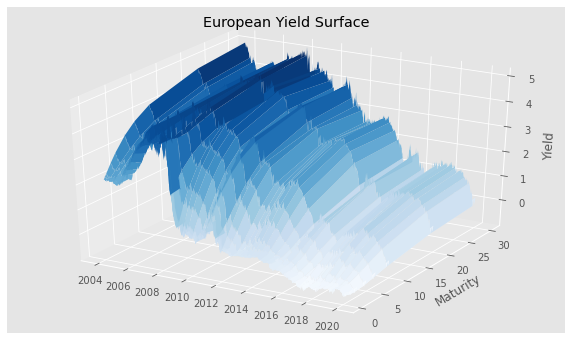

In [69]:
#Explorative analysis

#Plot the yield curves - 3D plot

df = data.drop(columns=['Date'])

start = pd.to_datetime(data.Date.iloc[0]).year
end = pd.to_datetime(data.Date.iloc[-1]).year + 1

def plot_yield_surface(dat, start, end, title, yield_plot=True):

    
    t = np.array([900/360, 180/360, 270/360, 1, 2,3,5,7,10,20,30])
    y = np.linspace(start, end, len(dat))
    X, Y = np.meshgrid(t, y)
    

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title('European Yield Surface')
    ax.set_ylabel('Maturity')
    ax.set_zlabel('Yield')
    
    # customize the z axis.

    ax.plot_surface(Y,X,dat, cmap='Blues')

    plt.show()
    
#%%
plot_yield_surface(df, start, end, "European Yield Surface", True)

In the above figure, we provide a 3-dimensional plot of our yield curve data along the time period from 09/2004
to 10/2019. The data plot suggests the presence of an underlying factor structure. Although the yield series
vary heavily over time for each of the maturities.

In [51]:
#Explorative analysis

#Plot the yield curves - 2D plot

Date = np.array(pd.to_datetime(data['Date']))
data = data.set_index('Date')
data = data.copy()

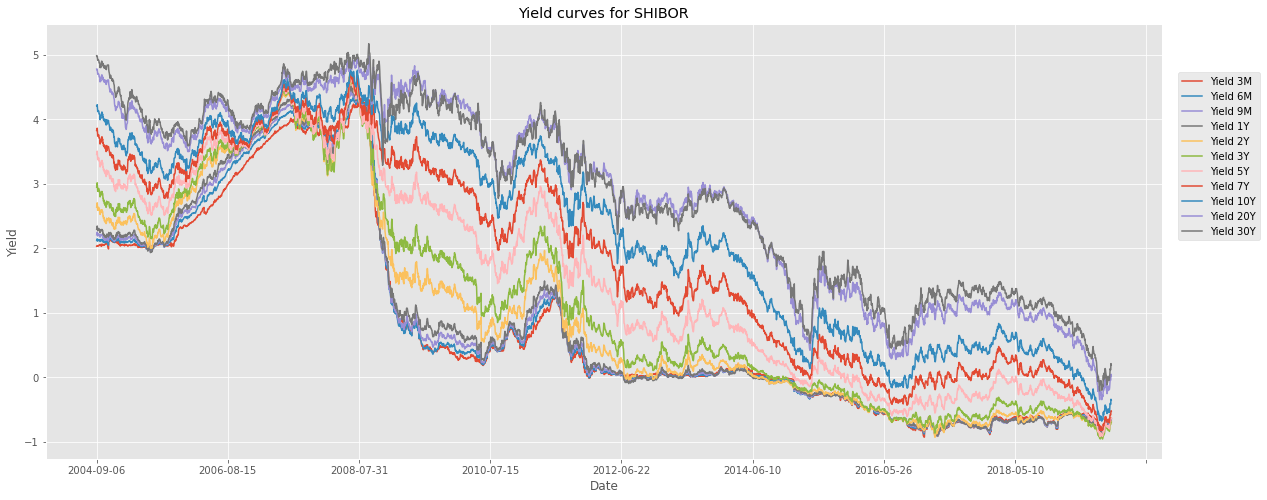

In [52]:
data.plot(figsize=(20, 8))
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Yield curves for SHIBOR')
plt.legend(bbox_to_anchor=(1.01,0.9), loc=2)
plt.show()


The yield curve is an upward-sloping function of time to maturity, for the period 2004-09-06 to 2006-08-15. But, within our sample period, the overall level of the yield curve shows a downward trend. Also, we observe that the volatility of bonds with a longer time to maturity is lower than for bonds with a shorter time to maturity.

In [58]:
print(data.describe())

          Yield 3M     Yield 6M     Yield 9M     Yield 1Y     Yield 2Y  \
count  3868.000000  3868.000000  3868.000000  3868.000000  3868.000000   
mean      0.805822     0.831542     0.859770     0.890171     1.030099   
std       1.531477     1.567859     1.587664     1.599459     1.617692   
min      -0.929979    -0.914679    -0.912595    -0.907851    -0.939791   
25%      -0.435595    -0.426283    -0.420954    -0.414862    -0.387349   
50%       0.126719     0.118996     0.121734     0.150766     0.392126   
75%       2.047392     2.081525     2.113262     2.142788     2.332682   
max       4.325459     4.356957     4.447425     4.539553     4.713764   

          Yield 3Y     Yield 5Y     Yield 7Y    Yield 10Y    Yield 20Y  \
count  3868.000000  3868.000000  3868.000000  3868.000000  3868.000000   
mean      1.193942     1.549917     1.881435     2.267465     2.795292   
std       1.618155     1.600562     1.576501     1.544965     1.473169   
min      -0.957691    -0.918779    -0

For each curve, the means and standard deviations are stated for different maturities over the period 2004-2019. The data indicates that average over the period 2004-2019 the yield curve shows the upward sloping behavior and the rates with
higher maturity are less volatile than the rates with lower maturity.

In [59]:
#Skewness

data.skew(axis = 0, skipna = True) 

#kurtosis

data.kurt(axis = 0, skipna = True) 


Yield 3M    -0.475526
Yield 6M    -0.536262
Yield 9M    -0.586002
Yield 1Y    -0.638258
Yield 2Y    -0.889368
Yield 3Y    -1.121343
Yield 5Y    -1.392509
Yield 7Y    -1.480777
Yield 10Y   -1.468312
Yield 20Y   -1.336076
Yield 30Y   -1.328434
dtype: float64

Furthermore, yields for maturities up to 7-years are positively skewed and the 10-year, 20-year & 30-year maturities are negatively skewed. Kurtosis is negative for all maturities and decreasing along with increasing maturity.

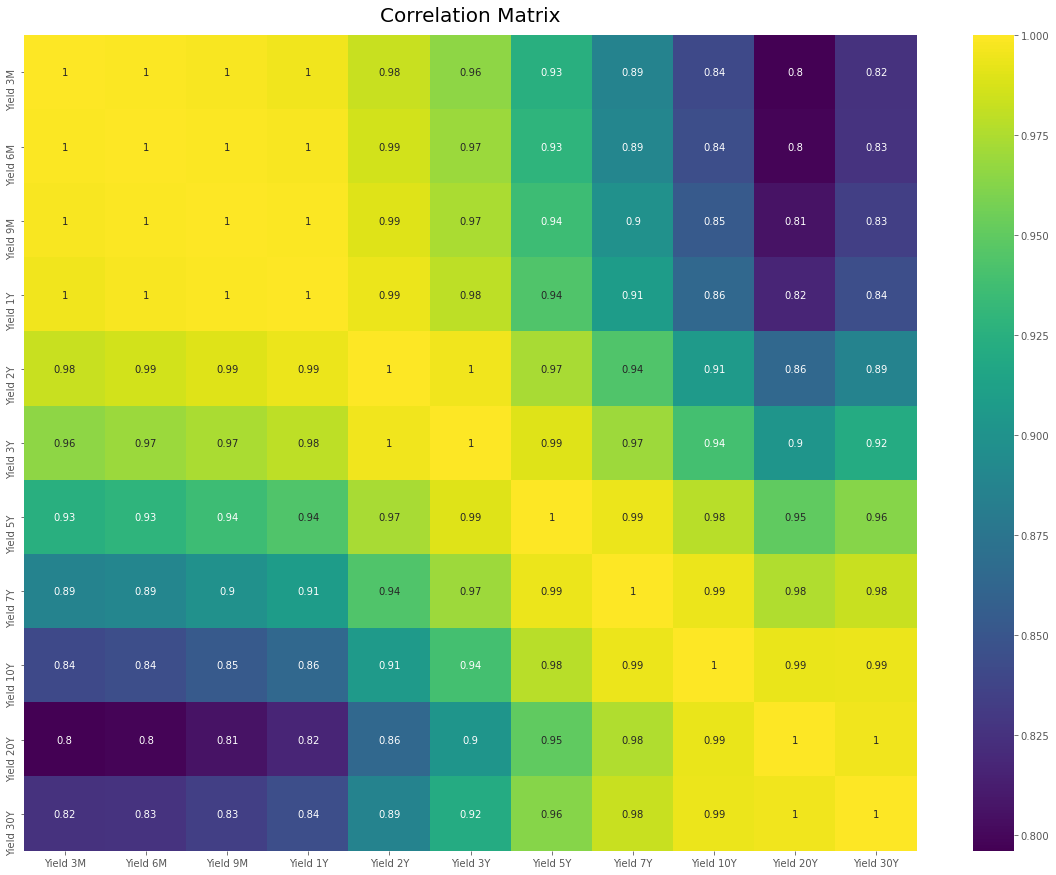

In [60]:
#Correlation plots

import seaborn as sns

plt.figure(figsize=(20,15))
plt.title('Correlation Matrix', fontsize=20,y=1.01)
sns.heatmap(np.round(data.corr(),3), annot=True, cmap="viridis");

The correlation matrix shows correlation coefficients for all yields with different maturities. It can be noticed that all
yields with different maturities above 2-year are highly correlated among themselves with the correlation
coefficients above 0.9.